In [1]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#csv = 'sales_data.csv'
csv = 'updated_2.csv'
data_viz = pd.read_csv(csv)

data_viz.head()

,postcode,house_is,property_subtype,price,rooms_number,area,kitchen_has,furnished,terrace,garden,facades_number,swimming_pool_has,building_state,province,region
0,1150,True,HOUSE,990000.0,6.0,485.0,False,Not specified,Not specified,False,2.0,False,As New,Brussels Capital Region,Brussels
1,4180,True,HOUSE,195000.0,3.0,242.0,False,False,Not specified,False,3.0,False,Not specified,Liège,Wallonia
2,4480,True,HOUSE,245000.0,5.0,142.0,False,False,Not specified,False,4.0,False,Not specified,Liège,Wallonia
3,4180,True,MIXED_USE_BUILDING,295000.0,3.0,242.0,False,False,Not specified,False,3.0,False,Not specified,Liège,Wallonia
4,4570,True,HOUSE,549000.0,5.0,365.0,False,False,Not specified,False,4.0,False,Not specified,Liège,Wallonia


In [3]:
data_viz.columns.tolist()

['postcode',
 'house_is',
 'property_subtype',
 'price',
 'rooms_number',
 'area',
 'kitchen_has',
 'furnished',
 'terrace',
 'garden',
 'facades_number',
 'swimming_pool_has',
 'building_state',
 'province',
 'region']

In [4]:
data_viz['price'].describe()

count    2.623400e+04
mean     4.260374e+05
std      5.243121e+05
min      0.000000e+00
25%      2.017350e+05
50%      2.895000e+05
75%      4.393750e+05
max      2.345679e+07
Name: price, dtype: float64

In [5]:
data_viz.dtypes

postcode               int64
house_is                bool
property_subtype      object
price                float64
rooms_number         float64
area                 float64
kitchen_has           object
furnished             object
terrace               object
garden                object
facades_number       float64
swimming_pool_has     object
building_state        object
province              object
region                object
dtype: object

In [6]:
data_viz01 = data_viz.groupby('province').price.mean()
data_viz01

province
Antwerp                    424369.588752
Brussels Capital Region    688757.505130
East Flanders              356208.002509
Flemish Brabant            492421.287146
Hainaut                    250797.550872
Limburg                    302819.010593
Liège                      273517.533107
Luxembourg                 280089.378223
Namur                      282590.092890
Walloon Brabant            570597.516104
West Flanders              454044.505666
Name: price, dtype: float64

In [7]:
data_viz02 = data_viz.groupby(['province','property_subtype']).price.mean()
data_viz02

province       property_subtype
Antwerp        APARTMENT           3.344166e+05
               APARTMENT_BLOCK     1.010359e+06
               Apartment           2.933846e+05
               BUNGALOW            6.000000e+04
               CASTLE              2.500000e+06
                                       ...     
West Flanders  mansion             4.950000e+05
               penthouse           4.056000e+05
               town-house          2.493333e+05
               triplex             4.450000e+05
               villa               7.934194e+05
Name: price, Length: 387, dtype: float64

In [8]:
data_viz03 = data_viz.groupby('province').area.mean()
data_viz03

province
Antwerp                    157.344278
Brussels Capital Region    190.420356
East Flanders              143.262894
Flemish Brabant            181.843573
Hainaut                    169.307049
Limburg                    149.564619
Liège                      166.227504
Luxembourg                 175.498567
Namur                      181.348624
Walloon Brabant            214.621367
West Flanders              112.912551
Name: area, dtype: float64

In [9]:
data_viz04a = data_viz.groupby(['region','property_subtype']).price.max()
data_viz04a

region    property_subtype    
Brussels  APARTMENT               3900000.0
          APARTMENT_BLOCK         6700000.0
          Apartment               2500000.0
          DUPLEX                  3900000.0
          EXCEPTIONAL_PROPERTY    5950000.0
                                    ...    
Wallonia  other-property           459000.0
          penthouse                685000.0
          town-house               442000.0
          triplex                  360000.0
          villa                    999000.0
Name: price, Length: 120, dtype: float64

In [10]:
data_viz04 = data_viz.groupby(['region','property_subtype']).price.min()
data_viz04

region    property_subtype    
Brussels  APARTMENT                60000.0
          APARTMENT_BLOCK         135000.0
          Apartment                99500.0
          DUPLEX                  135000.0
          EXCEPTIONAL_PROPERTY    485000.0
                                    ...   
Wallonia  other-property          459000.0
          penthouse               195000.0
          town-house              150000.0
          triplex                 327500.0
          villa                   120000.0
Name: price, Length: 120, dtype: float64

In [11]:
data_viz05 = data_viz.groupby(['region','property_subtype']).price.mean()
data_viz05

region    property_subtype    
Brussels  APARTMENT               5.567296e+05
          APARTMENT_BLOCK         1.027445e+06
          Apartment               3.391264e+05
          DUPLEX                  5.773136e+05
          EXCEPTIONAL_PROPERTY    2.140619e+06
                                      ...     
Wallonia  other-property          4.590000e+05
          penthouse               3.340833e+05
          town-house              2.539312e+05
          triplex                 3.437500e+05
          villa                   4.133874e+05
Name: price, Length: 120, dtype: float64

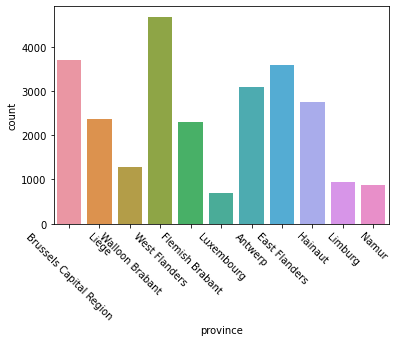

In [12]:
# Count Plot (a.k.a. Bar Plot)
#sns.countplot(x='province', data=data_viz03)
sns.countplot(x='province', data=data_viz)


# Rotate x-labels
plt.xticks(rotation=-45);

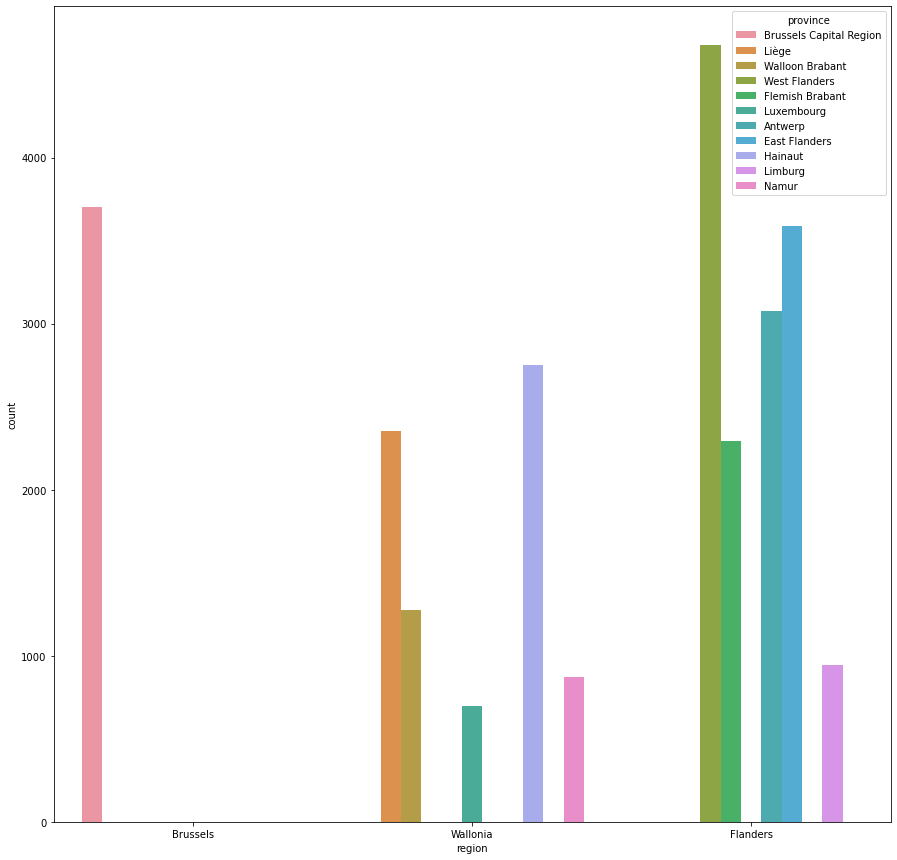

In [13]:
plt.figure(figsize=(15,15))
sns.countplot(x="region", hue="province", data=data_viz)
plt.show() 

#data_viz03 = data_viz.groupby('province').area.mean()

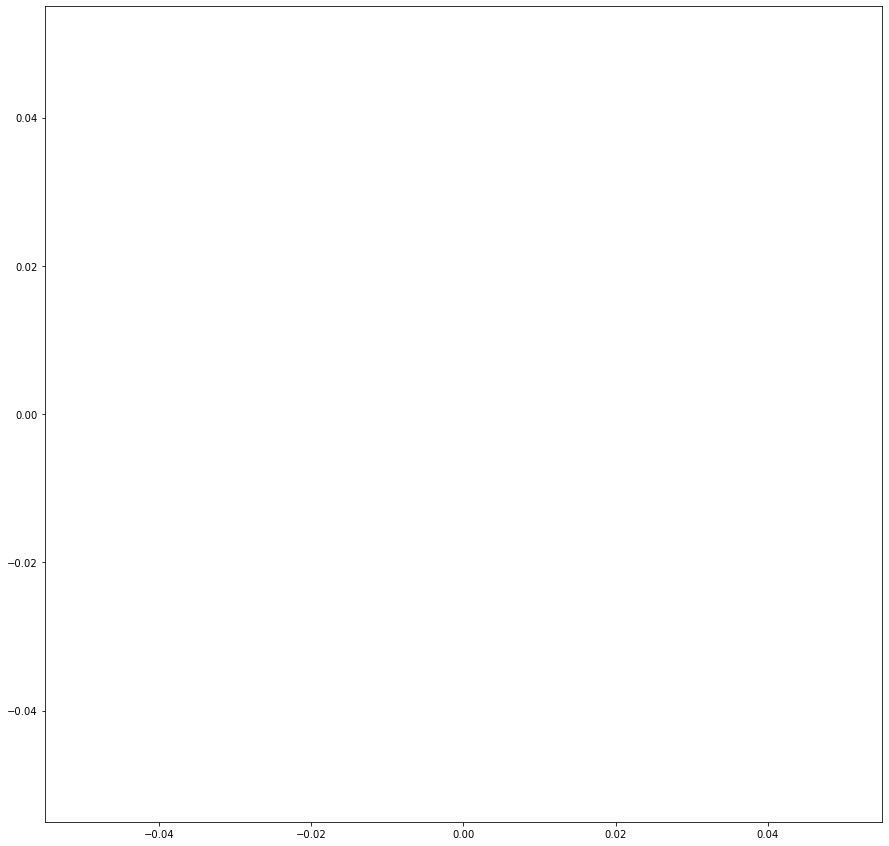

In [14]:
plt.figure(figsize=(15,15))

sns.scatterplot(data=data_viz, x="province", y=data_viz.groupby('province').area.mean())

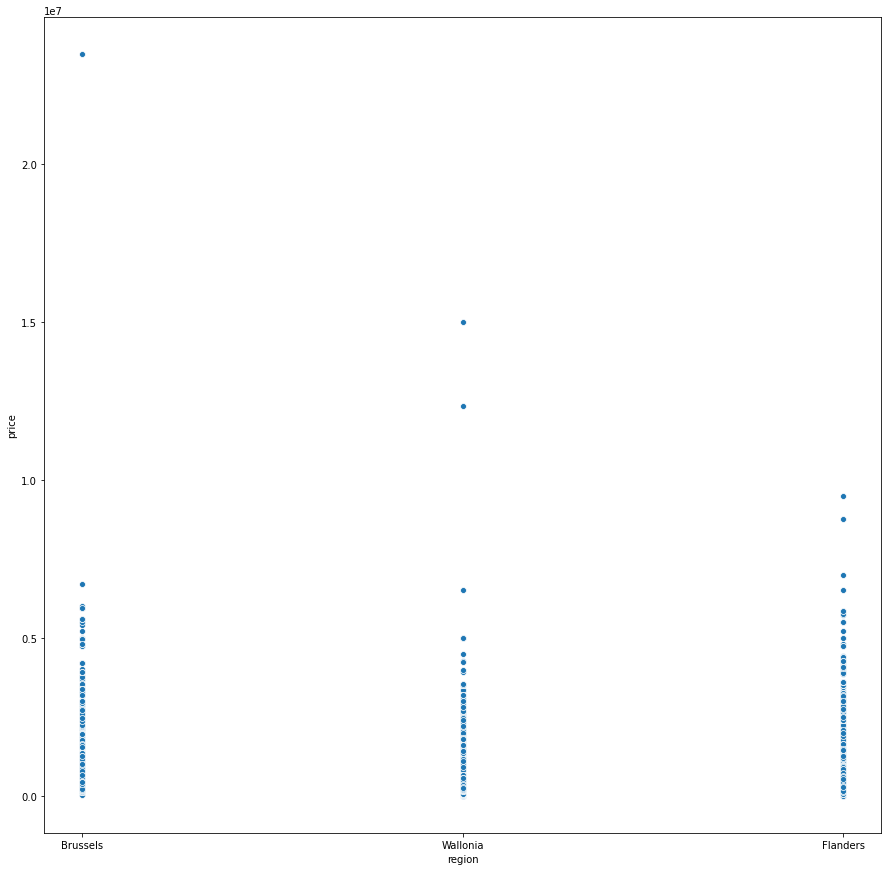

In [15]:
plt.figure(figsize=(15,15))

sns.scatterplot(data=data_viz, x="region", y="price")

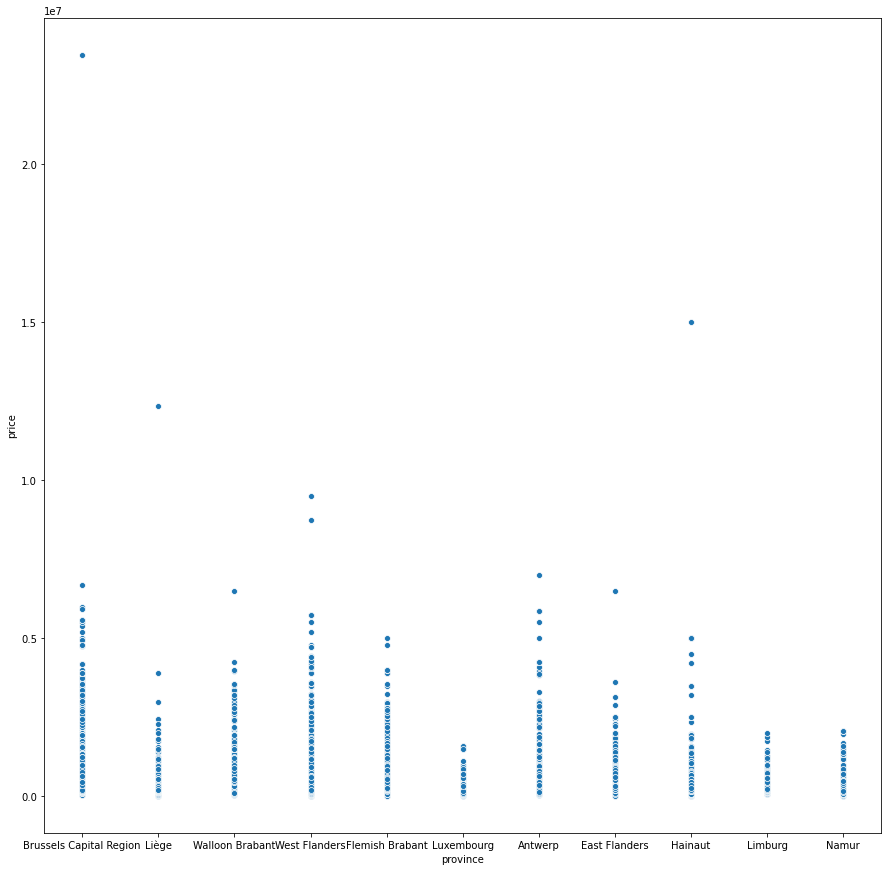

In [16]:


plt.figure(figsize=(15,15))


sns.scatterplot(data=data_viz, x="province", y="price")

In [17]:
data_viz['division_column'] = np.where((data_viz['price'] != 0) & (data_viz['area'] != 0),
                                data_viz['price'] / data_viz['area'], 0)

In [18]:
data_viz['division_column'] = data_viz['price'] / data_viz['area']
data_viz.head()

,postcode,house_is,property_subtype,price,rooms_number,area,kitchen_has,furnished,terrace,garden,facades_number,swimming_pool_has,building_state,province,region,division_column
0,1150,True,HOUSE,990000.0,6.0,485.0,False,Not specified,Not specified,False,2.0,False,As New,Brussels Capital Region,Brussels,2041.237113
1,4180,True,HOUSE,195000.0,3.0,242.0,False,False,Not specified,False,3.0,False,Not specified,Liège,Wallonia,805.785124
2,4480,True,HOUSE,245000.0,5.0,142.0,False,False,Not specified,False,4.0,False,Not specified,Liège,Wallonia,1725.352113
3,4180,True,MIXED_USE_BUILDING,295000.0,3.0,242.0,False,False,Not specified,False,3.0,False,Not specified,Liège,Wallonia,1219.008264
4,4570,True,HOUSE,549000.0,5.0,365.0,False,False,Not specified,False,4.0,False,Not specified,Liège,Wallonia,1504.109589


In [19]:
data_viz['average_price_column'] = data_viz['price'].sum() / len(data_viz['price'])
data_viz.head()

,postcode,house_is,property_subtype,price,rooms_number,area,kitchen_has,furnished,terrace,garden,facades_number,swimming_pool_has,building_state,province,region,division_column,average_price_column
0,1150,True,HOUSE,990000.0,6.0,485.0,False,Not specified,Not specified,False,2.0,False,As New,Brussels Capital Region,Brussels,2041.237113,426037.381452
1,4180,True,HOUSE,195000.0,3.0,242.0,False,False,Not specified,False,3.0,False,Not specified,Liège,Wallonia,805.785124,426037.381452
2,4480,True,HOUSE,245000.0,5.0,142.0,False,False,Not specified,False,4.0,False,Not specified,Liège,Wallonia,1725.352113,426037.381452
3,4180,True,MIXED_USE_BUILDING,295000.0,3.0,242.0,False,False,Not specified,False,3.0,False,Not specified,Liège,Wallonia,1219.008264,426037.381452
4,4570,True,HOUSE,549000.0,5.0,365.0,False,False,Not specified,False,4.0,False,Not specified,Liège,Wallonia,1504.109589,426037.381452


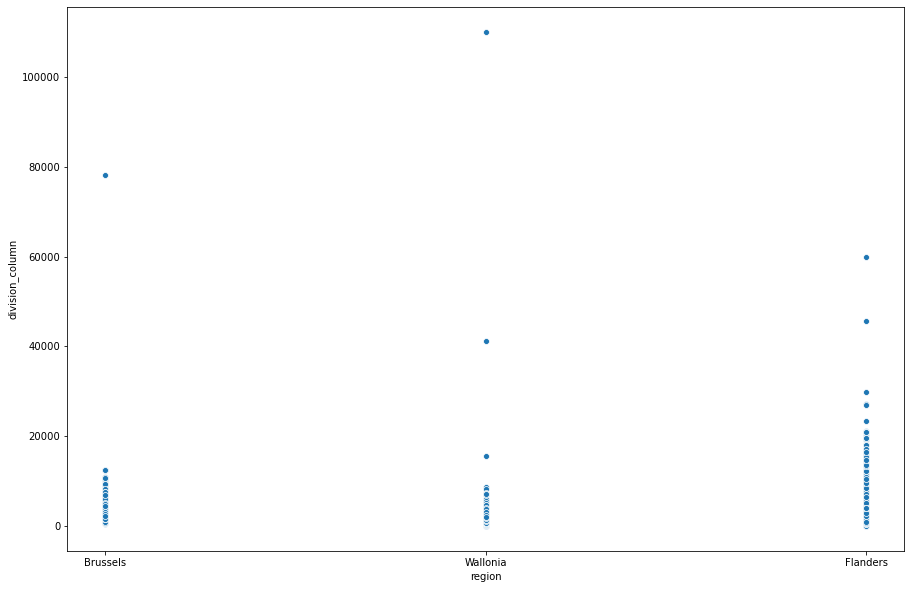

In [20]:
# price/m2 per region

plt.figure(figsize=(15,10))


sns.scatterplot(data=data_viz, x="region", y="division_column")

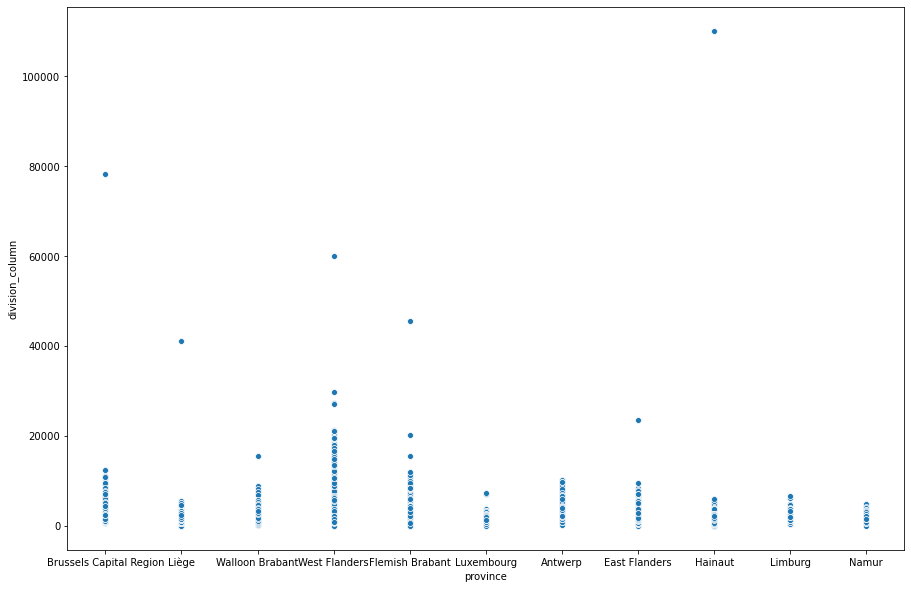

In [21]:
# price/m2 per province

plt.figure(figsize=(15,10))


sns.scatterplot(data=data_viz, x="province", y="division_column")

In [22]:

data_viz_Belgium_min_outliers = data_viz[data_viz.division_column < 20000]

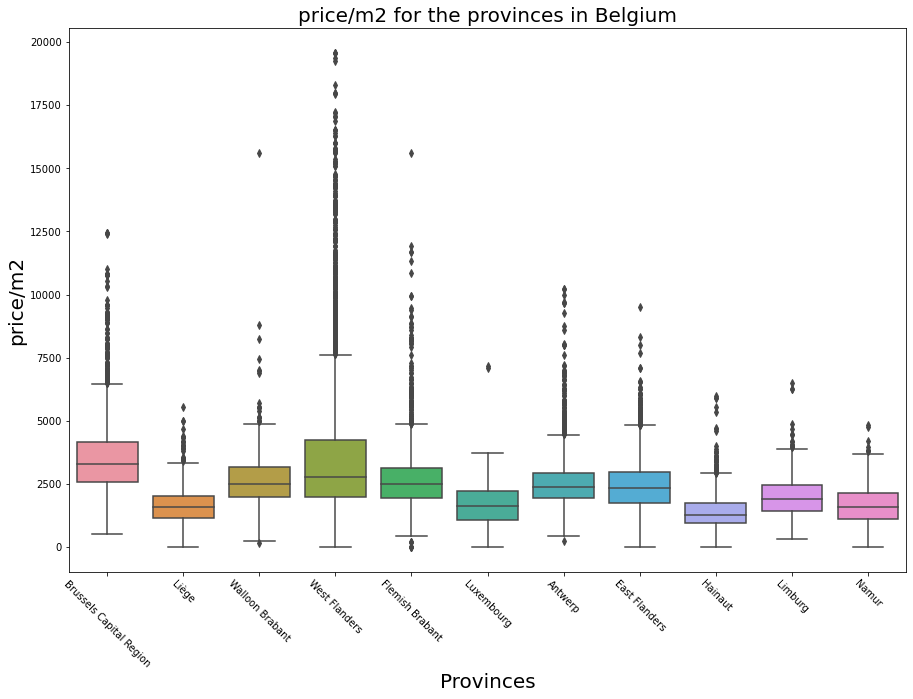

In [23]:


# average price per m2 for Wallonia provinces
plt.figure(figsize=(15,10))

ax = sns.boxplot(data=data_viz_Belgium_min_outliers, x="province", y="division_column")
ax.set_title('price/m2 for the provinces in Belgium', size = 20);
ax.set_xlabel("Provinces", size = 20)
ax.set_ylabel("price/m2", size = 20)



# Rotate x-labels
plt.xticks(rotation=-45);

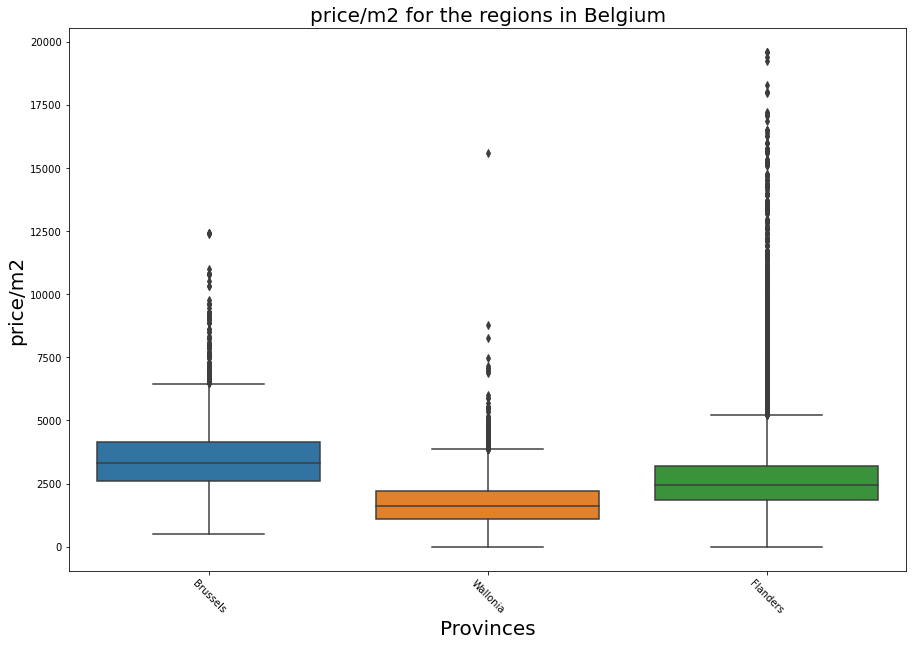

In [24]:


# average price per m2 for regions
plt.figure(figsize=(15,10))

ax = sns.boxplot(data=data_viz_Belgium_min_outliers, x="region", y="division_column")
ax.set_title('price/m2 for the regions in Belgium', size = 20);
ax.set_xlabel("Provinces", size = 20)
ax.set_ylabel("price/m2", size = 20)



# Rotate x-labels
plt.xticks(rotation=-45);

In [25]:
#data_viz_Brussels = data_viz[(data_viz["region"] == "Brussels") 
                             
data_viz_Brussels = data_viz[data_viz["region"] == "Brussels"]
data_viz_Wallonia = data_viz[data_viz["region"] == "Wallonia"]
data_viz_Flanders = data_viz[data_viz["region"] == "Flanders"]

In [26]:
data_viz_Brussels['pricem2_column'] = data_viz_Brussels['price'] / data_viz_Brussels['area']
#data_viz_Brussels.head()

<ipython-input-26-aabda70905fe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_viz_Brussels['pricem2_column'] = data_viz_Brussels['price'] / data_viz_Brussels['area']


In [27]:
data_viz_Wallonia['pricem2_column'] = data_viz_Wallonia['price'] / data_viz_Wallonia['area']

<ipython-input-27-d1f16c718960>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_viz_Wallonia['pricem2_column'] = data_viz_Wallonia['price'] / data_viz_Wallonia['area']


In [28]:
data_viz_Flanders['pricem2_column'] = data_viz_Flanders['price'] / data_viz_Flanders['area']

<ipython-input-28-5177d67c14bc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_viz_Flanders['pricem2_column'] = data_viz_Flanders['price'] / data_viz_Flanders['area']


In [29]:
#with outliers removed

data_viz_Brussels_min_outliers = data_viz_Brussels[data_viz_Brussels.pricem2_column < 20000]



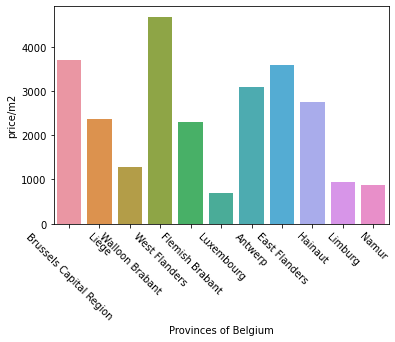

In [30]:
# Count Plot (a.k.a. Bar Plot)
#sns.countplot(x='province', data=data_viz03)
ax = sns.countplot(x='province', data=data_viz)

ax.set_xlabel("Provinces of Belgium")
ax.set_ylabel("price/m2")



# Rotate x-labels
plt.xticks(rotation=-45);

Text(0, 0.5, 'price/m2')

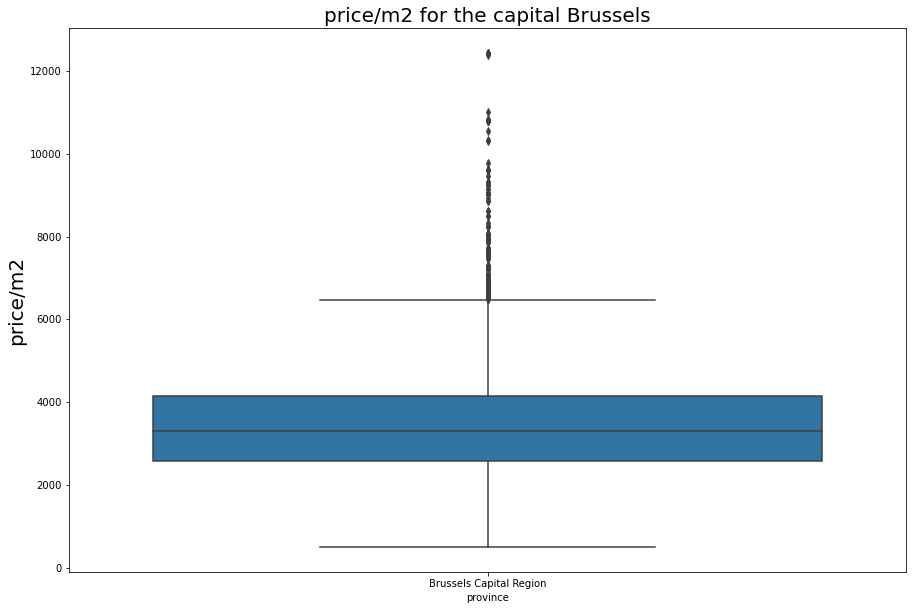

In [31]:
# average price per m2 for Brussels
plt.figure(figsize=(15,10))

ax = sns.boxplot(data=data_viz_Brussels_min_outliers, x="province", y="pricem2_column")
ax.set_title('price/m2 for the capital Brussels', size = 20);
#ax.set_xlabel("Provinces of Wallonia", size = 20)
ax.set_ylabel("price/m2", size = 20)



# Rotate x-labels
#plt.xticks(rotation=-45);

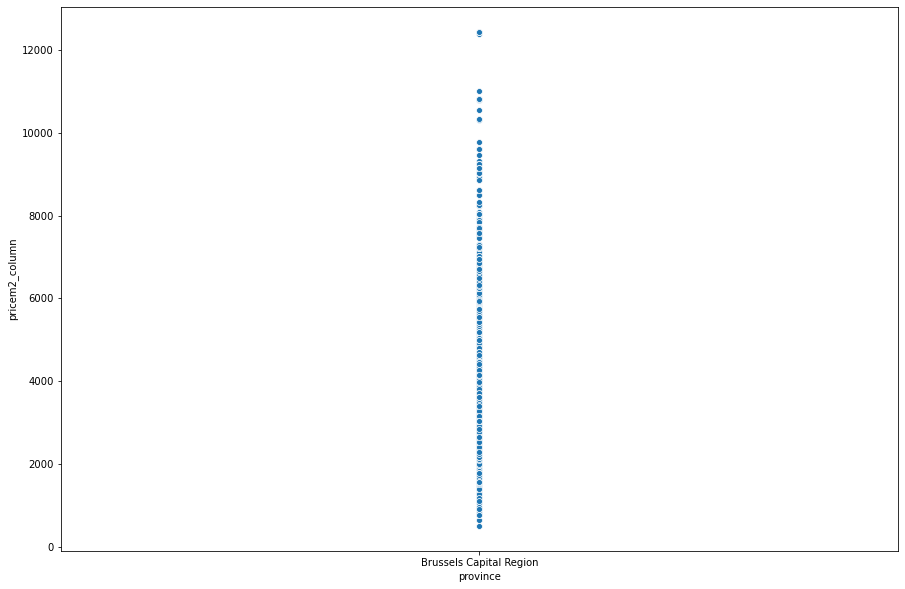

In [32]:
# average price per m2 for Brussels provinces
plt.figure(figsize=(15,10))

sns.scatterplot(data=data_viz_Brussels_min_outliers, x="province", y="pricem2_column")

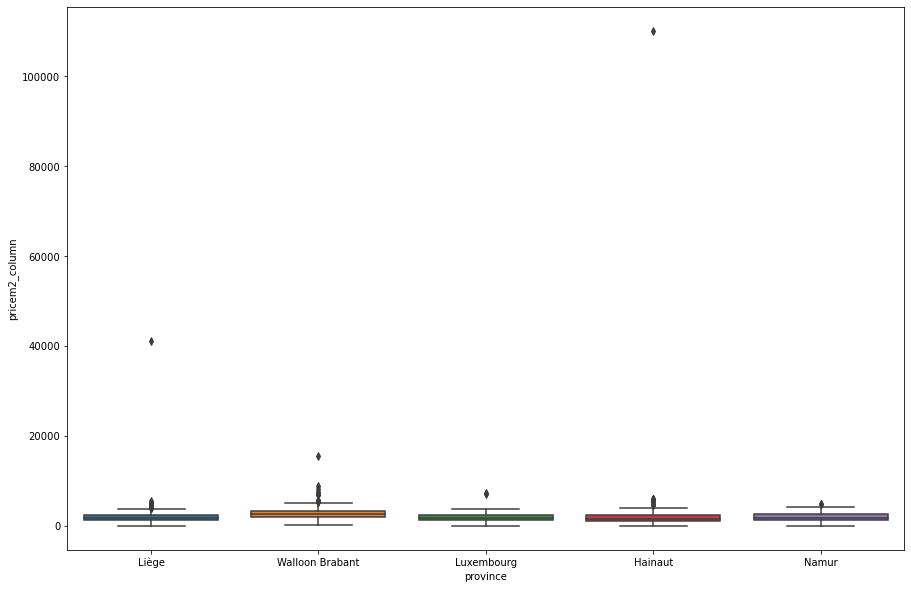

In [33]:
# average price per m2 for Wallonia provinces WITH OUTLIERS
plt.figure(figsize=(15,10))

sns.boxplot(data=data_viz_Wallonia, x="province", y="pricem2_column")

In [34]:
#with outliers removed

data_viz_Wallonia_min_outliers = data_viz_Wallonia[data_viz_Wallonia.pricem2_column < 10000]

Text(0, 0.5, 'price/m2')

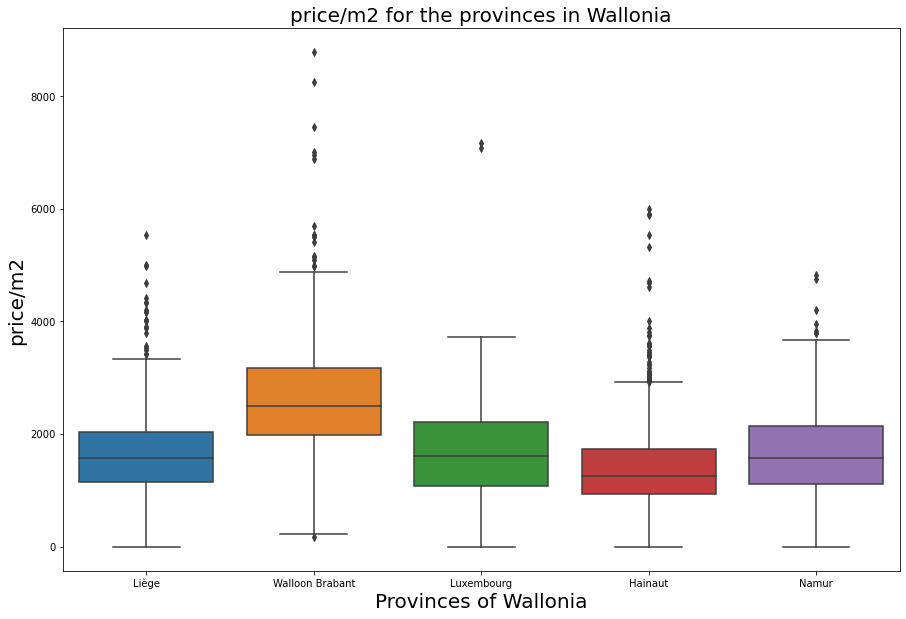

In [35]:
# average price per m2 for Wallonia provinces
plt.figure(figsize=(15,10))

ax = sns.boxplot(data=data_viz_Wallonia_min_outliers, x="province", y="pricem2_column")
ax.set_title('price/m2 for the provinces in Wallonia', size = 20);
ax.set_xlabel("Provinces of Wallonia", size = 20)
ax.set_ylabel("price/m2", size = 20)



# Rotate x-labels
#plt.xticks(rotation=-45);

Text(0, 0.5, 'price/m2')

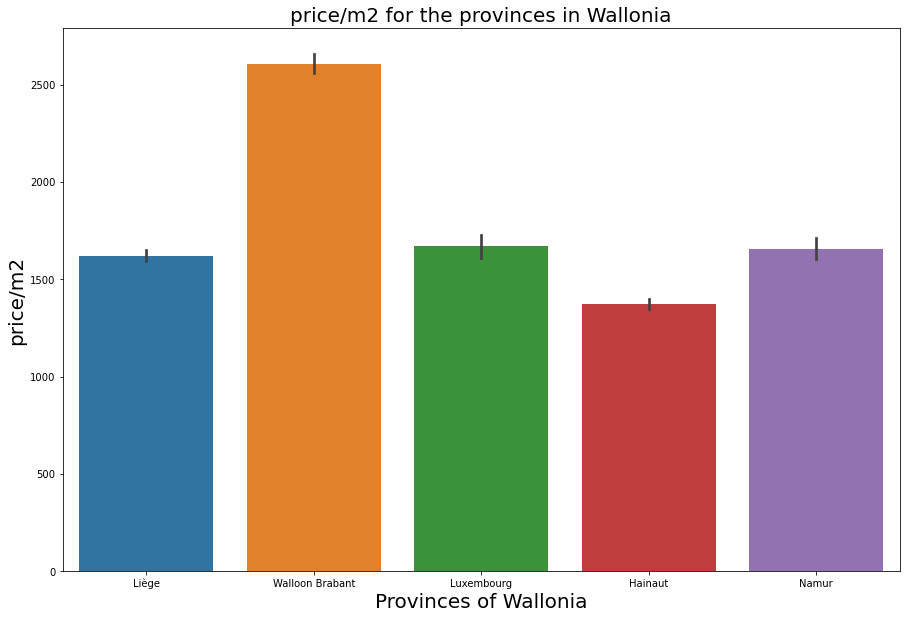

In [36]:
# average price per m2 for Flanders provinces
plt.figure(figsize=(15,10))

ax = sns.barplot(data=data_viz_Wallonia_min_outliers, x="province", y="pricem2_column")

ax.set_title('price/m2 for the provinces in Wallonia', size = 20);
ax.set_xlabel("Provinces of Wallonia", size = 20)
ax.set_ylabel("price/m2", size = 20)


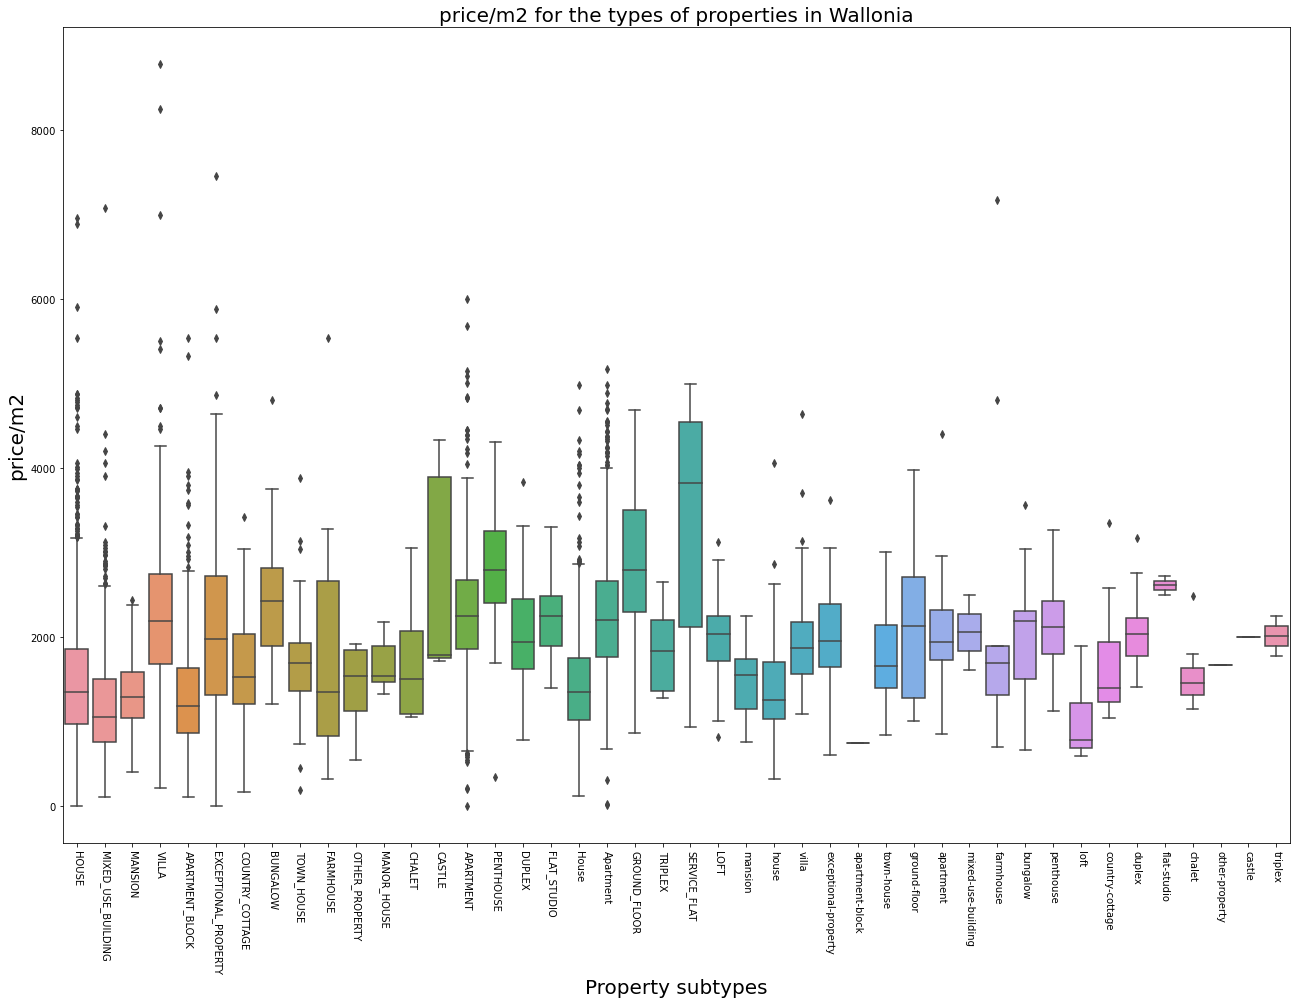

In [37]:
plt.figure(figsize=(22,15))

ax = sns.boxplot(data=data_viz_Wallonia_min_outliers, x="property_subtype", y="pricem2_column")
ax.set_title('price/m2 for the types of properties in Wallonia', size = 20);
ax.set_xlabel("Property subtypes", size = 20)
ax.set_ylabel("price/m2", size = 20)


# Rotate x-labels
plt.xticks(rotation=-90);

Text(0, 0.5, 'price/m2')

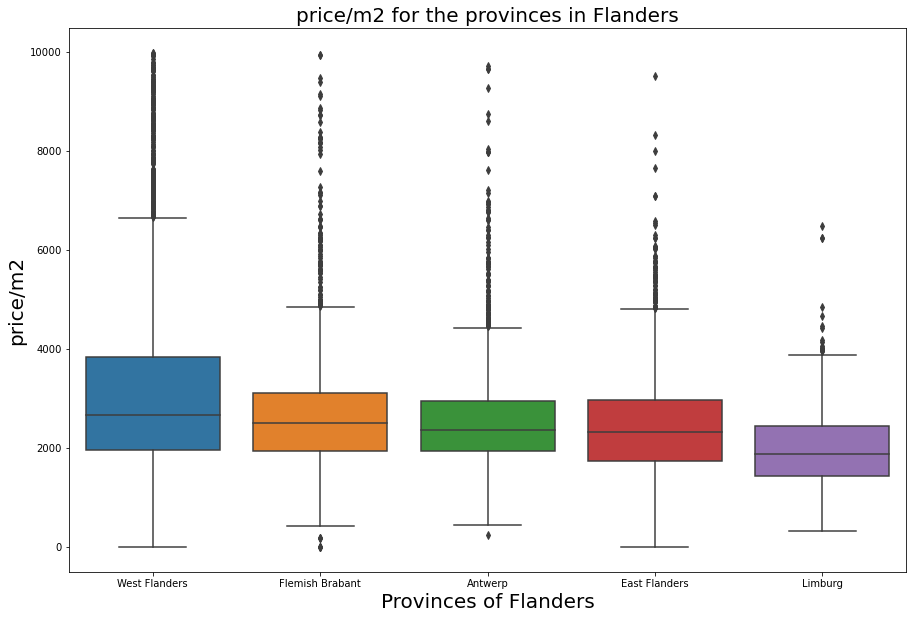

In [52]:
# average price per m2 for Flanders provinces
plt.figure(figsize=(15,10))

ax = sns.boxplot(data=data_viz_Flanders_min_outliers, x="province", y="pricem2_column")

ax.set_title('price/m2 for the provinces in Flanders', size = 20);
ax.set_xlabel("Provinces of Flanders", size = 20)
ax.set_ylabel("price/m2", size = 20)


In [39]:
data_viz_Brussels_min_outliers = data_viz_Brussels[(data_viz_Brussels.pricem2_column < 20000)]



# (data_viz04 = data_viz03[(data_viz03.location > 1999) & (data_viz03.location < 3000)])

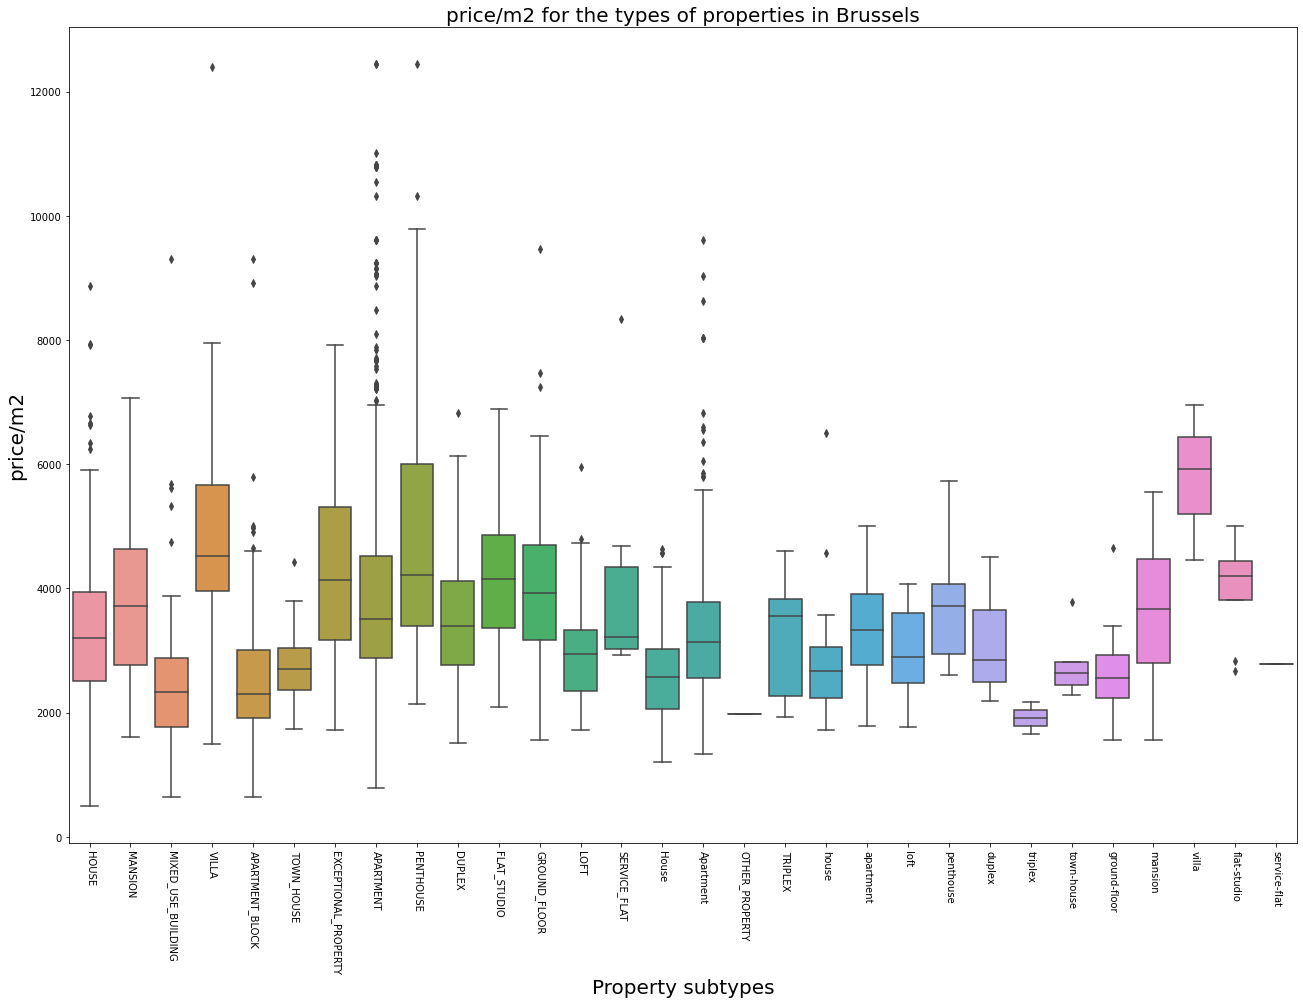

In [40]:
plt.figure(figsize=(22,15))

ax = sns.boxplot(data=data_viz_Brussels_min_outliers, x="property_subtype", y="pricem2_column")
ax.set_title('price/m2 for the types of properties in Brussels', size = 20);
ax.set_xlabel("Property subtypes", size = 20)
ax.set_ylabel("price/m2", size = 20)


# Rotate x-labels
plt.xticks(rotation=-90);

In [41]:
data_viz_Flanders_min_outliers = data_viz_Flanders[(data_viz_Flanders.pricem2_column < 10000)]



# (data_viz04 = data_viz03[(data_viz03.location > 1999) & (data_viz03.location < 3000)])

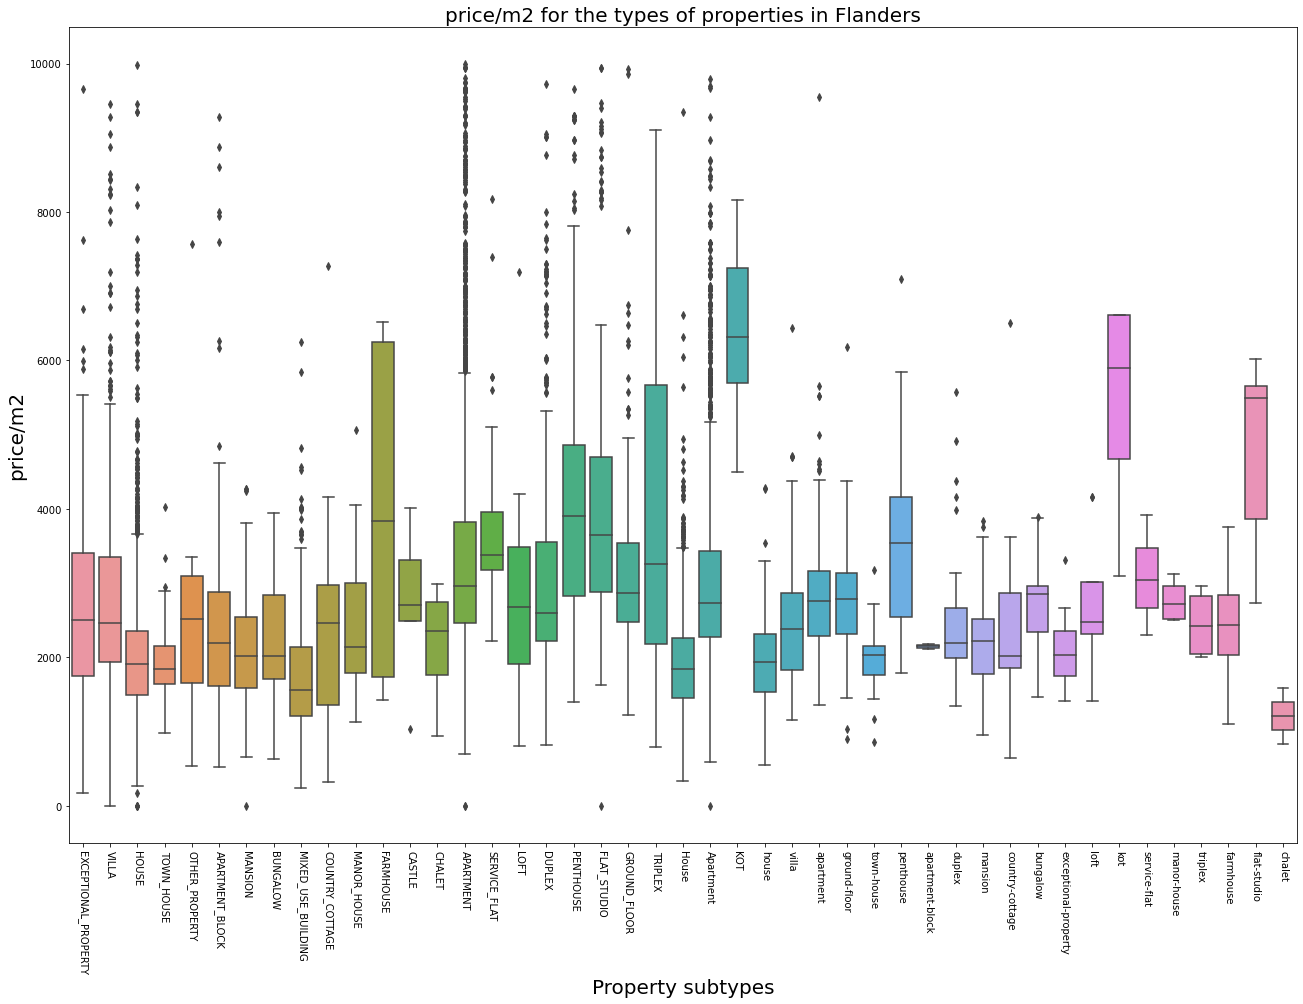

In [42]:
plt.figure(figsize=(22,15))

ax = sns.boxplot(data=data_viz_Flanders_min_outliers, x="property_subtype", y="pricem2_column")
ax.set_title('price/m2 for the types of properties in Flanders', size = 20);
ax.set_xlabel("Property subtypes", size = 20)
ax.set_ylabel("price/m2", size = 20)


# Rotate x-labels
plt.xticks(rotation=-90);

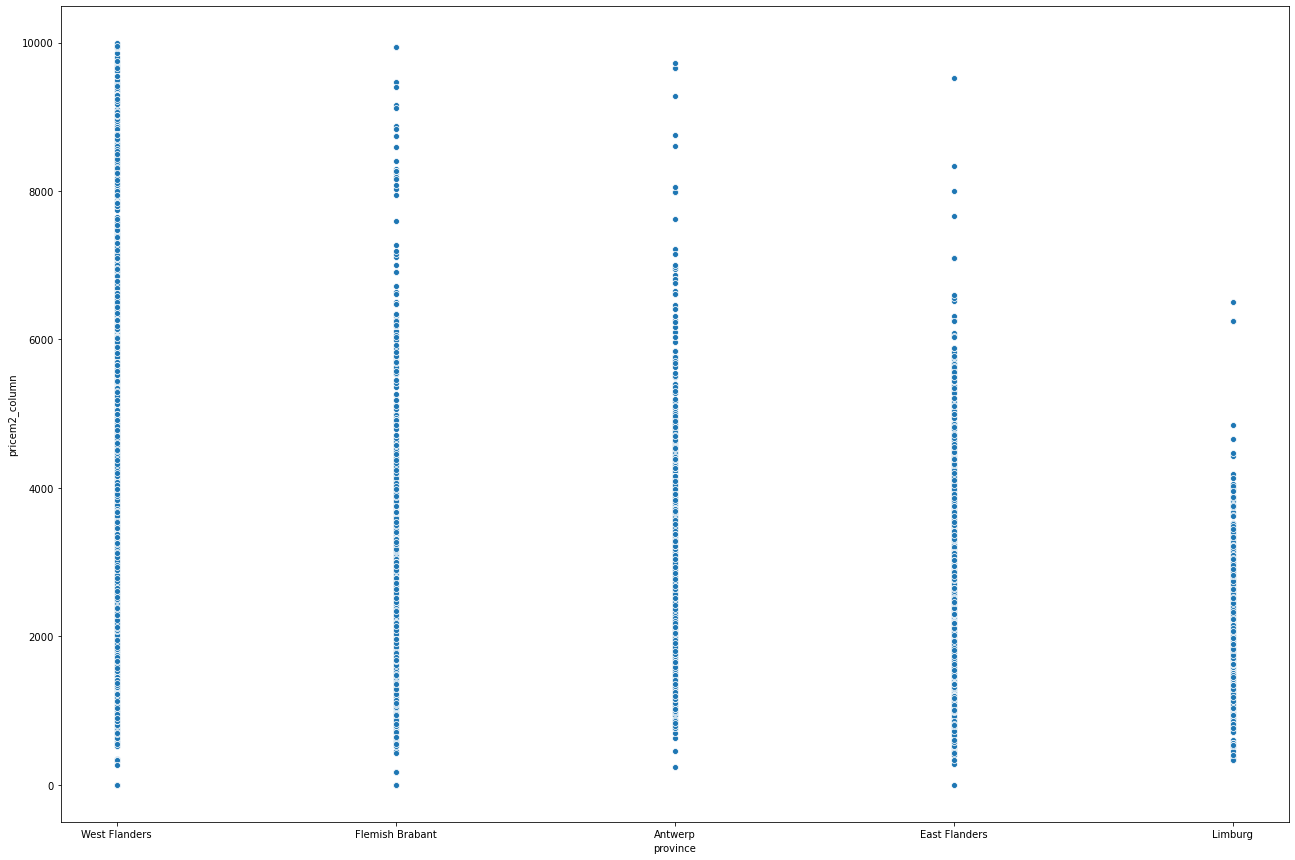

In [43]:
plt.figure(figsize=(22,15))

sns.scatterplot(data=data_viz_Flanders_min_outliers, x="province", y="pricem2_column")

Text(0, 0.5, 'price')

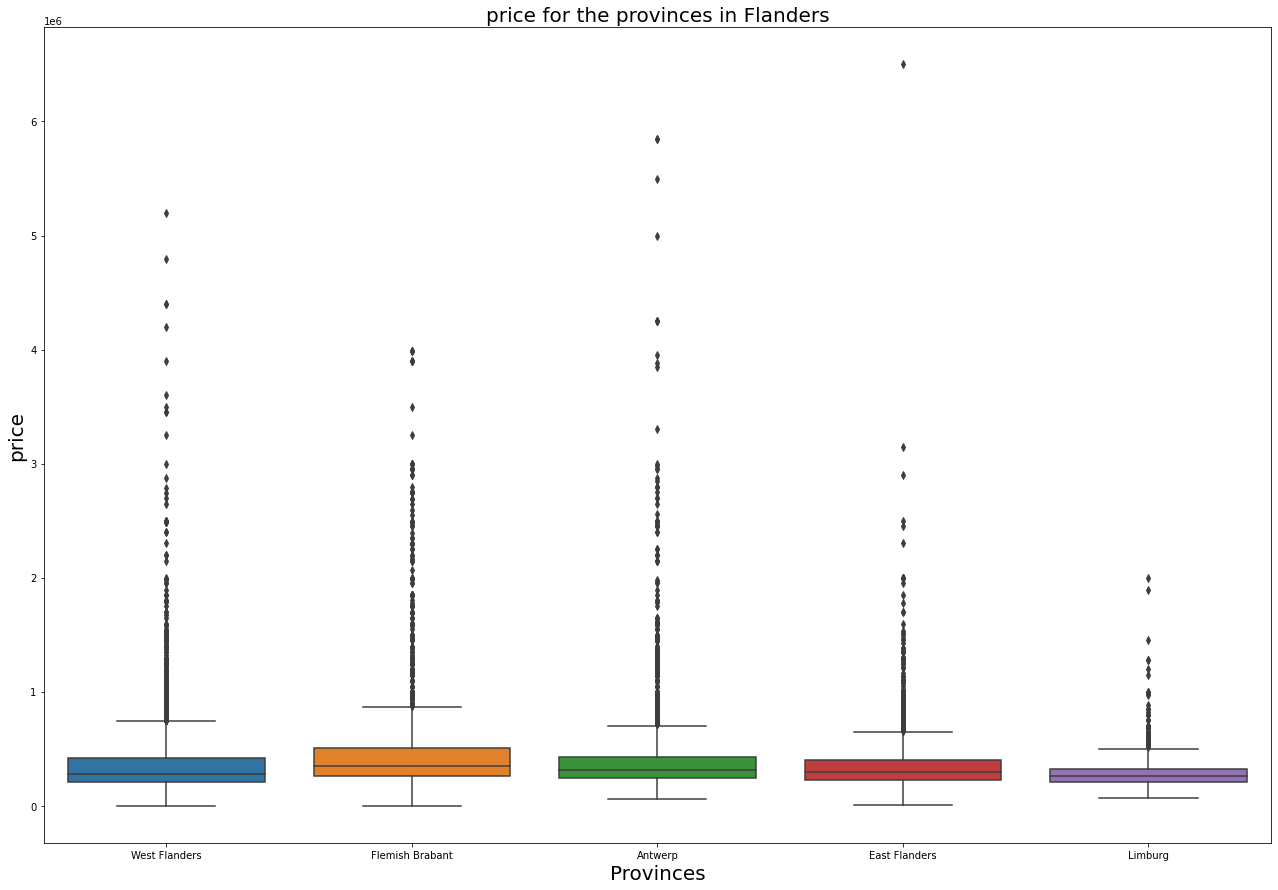

In [44]:
plt.figure(figsize=(22,15))

ax = sns.boxplot(data=data_viz_Flanders_min_outliers, x="province", y="price")
ax.set_title('price for the provinces in Flanders', size = 20);
ax.set_xlabel("Provinces", size = 20)
ax.set_ylabel("price", size = 20)


# Rotate x-labels
#plt.xticks(rotation=-90);

Text(0, 0.5, 'price')

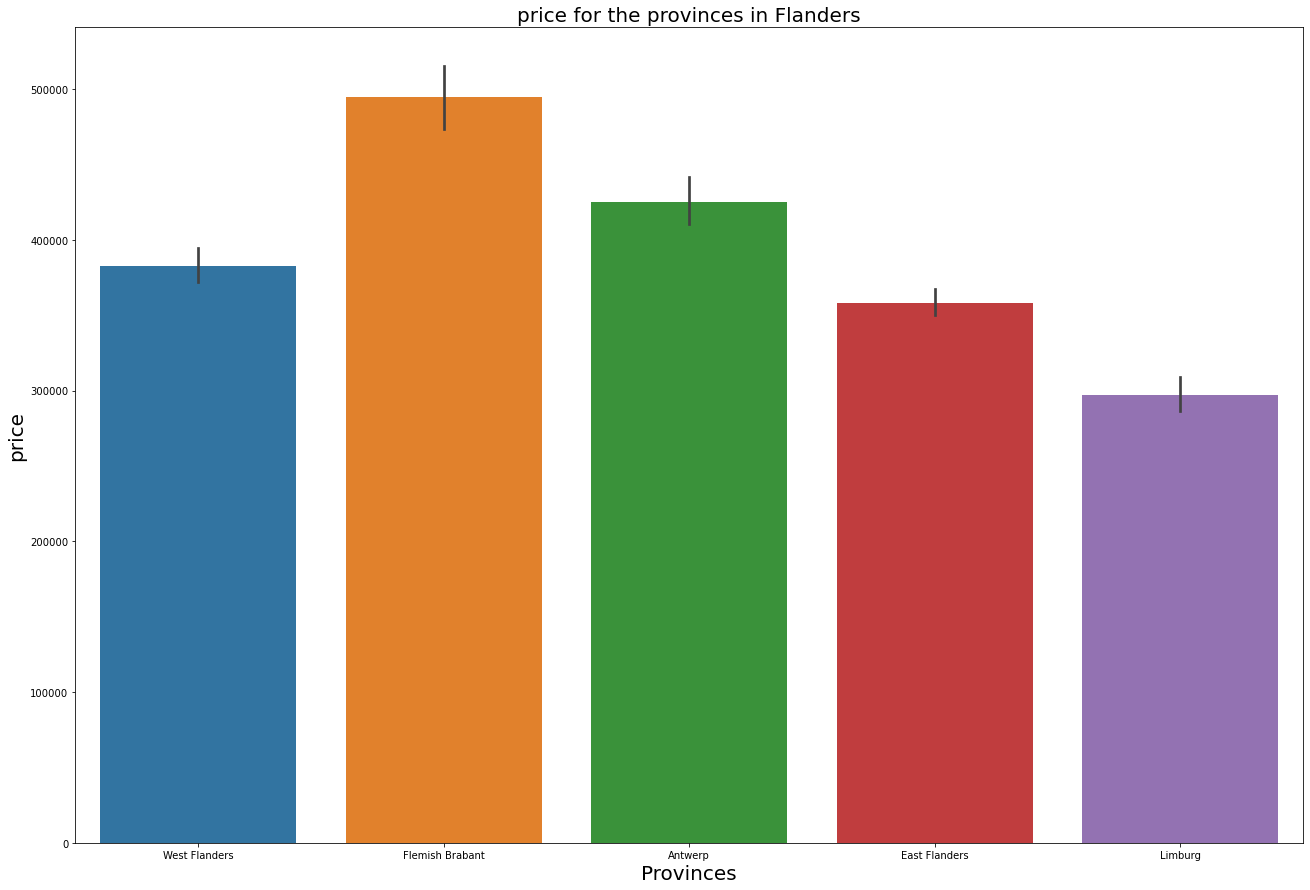

In [45]:
plt.figure(figsize=(22,15))

ax = sns.barplot(data=data_viz_Flanders_min_outliers, x="province", y="price")
ax.set_title('price for the provinces in Flanders', size = 20);
ax.set_xlabel("Provinces", size = 20)
ax.set_ylabel("price", size = 20)


# Rotate x-labels
#plt.xticks(rotation=-90);

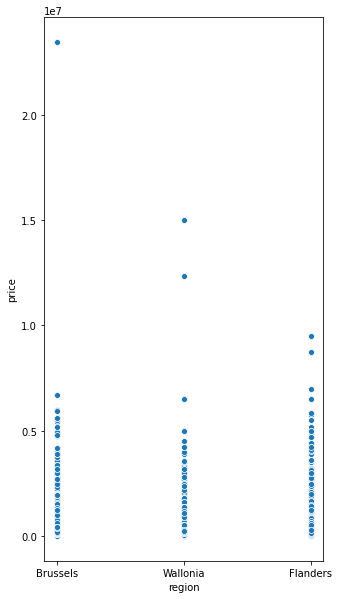

In [46]:
plt.figure(figsize=(5,10))

sns.scatterplot(data=data_viz, x="region", y="price")

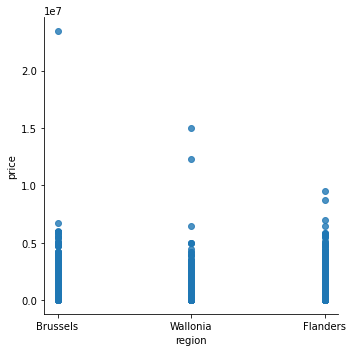

In [47]:
# Recommended way
sns.lmplot(x='region', y='price', fit_reg=False, data=data_viz)
 
# Alternative way
# sns.lmplot(x=df.Attack, y=df.Defense)

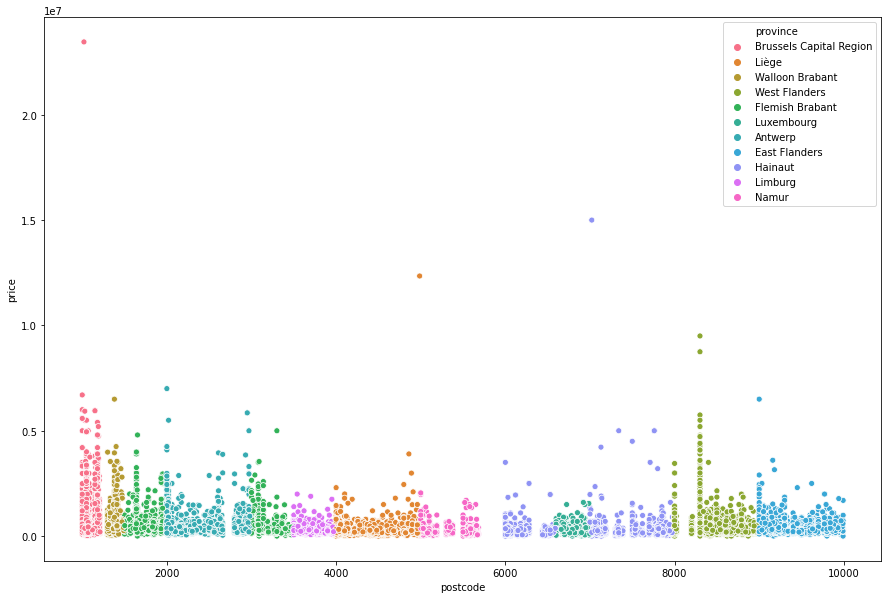

In [48]:
plt.figure(figsize=(15,10))
sns.scatterplot(x="postcode", y="price", hue="province", data=data_viz)
plt.show() 

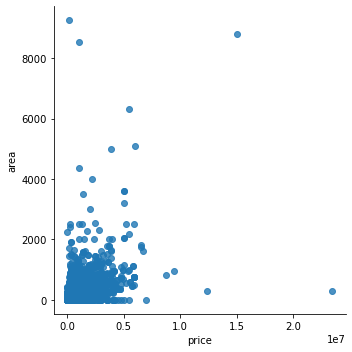

In [49]:
# Recommended way
sns.lmplot(x='price', y='area', fit_reg=False, data=data_viz)
 

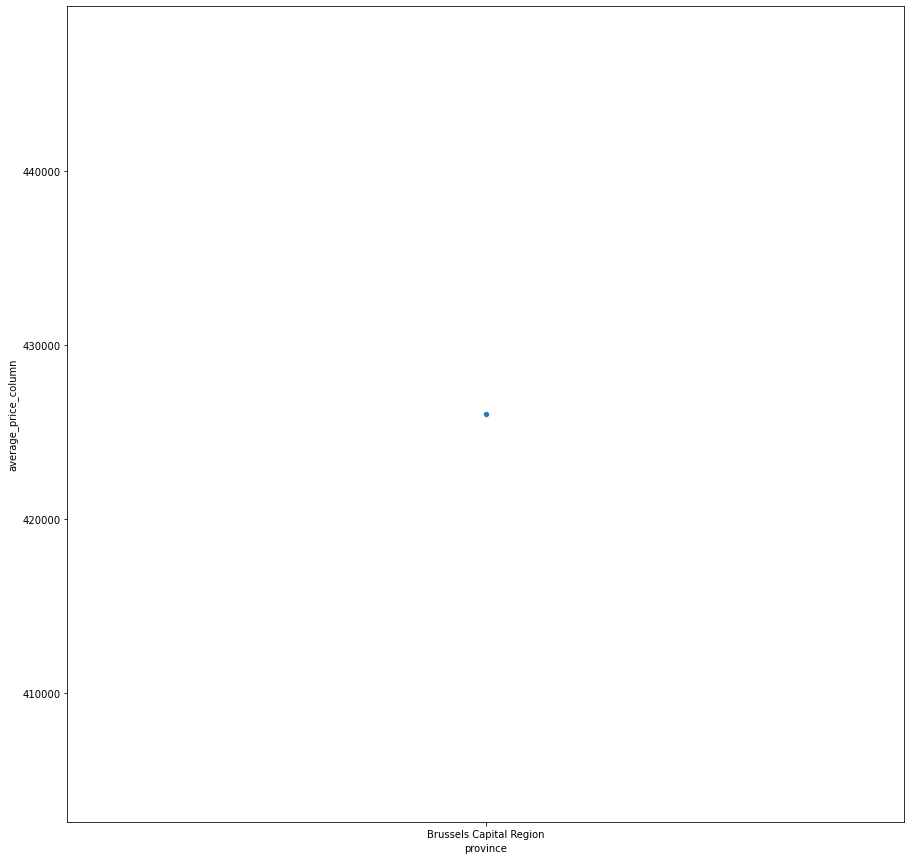

In [50]:
# information for Brussels average price 

plt.figure(figsize=(15,15))


sns.scatterplot(data=data_viz_Brussels, x="province", y="average_price_column")


In [51]:

#data_viz['division'] = data_viz['price'] / data_viz['area']

data_viz['division_column'].apply(lambda x:(x.data_viz['price'].sum()/x.data_viz['area'].sum()))


#uisers.groupby('new_index').apply(lambda x:(x.amount.sum()/x.quantity.sum()))


AttributeError: 'float' object has no attribute 'data_viz'